In [1]:
import music
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from reformattedDecisionTree import DecisionTreeClassifier
from reformattedDecisionTree import Node


In [2]:
#import GPUtil
#GPUtil.getAvailable()

In [3]:

data= music.get_music()
art_key=list(data[0]['artist'].keys())
art_key[1]='artist_hotttnesss'   #rename some of the header which has same name
art_key[2]='artist_id'
art_key[6]='artist_name'
song_key=list(data[0]['song'].keys())
song_key[8]='song_hotttnesss'
song_key[9]='song_id'
rel_key=list(data[0]['release'].keys())
rel_key[0]='release_id'
rel_key[1]='release_name'
headers=art_key+rel_key+song_key
all_row=[]
for i in range(len(data)):
    art_val=list(data[i]['artist'].values())
    rel_val=list(data[i]['release'].values())
    song_val=list(data[i]['song'].values())
    each_row=art_val+rel_val+song_val
    all_row.append(each_row)
    
filename = 'song.csv'
with open(filename, 'w', newline="") as file:
    csvwriter = csv.writer(file) 
    csvwriter.writerow(headers)
    csvwriter.writerows(all_row)
    
file_path = 'song.csv'
df = pd.read_csv(file_path)
print(df)

      familiarity  artist_hotttnesss           artist_id  latitude  location  \
0        0.581794           0.401998  ARD7TVE1187B99BFB1   0.00000         0   
1        0.630630           0.417500  ARMJAGH1187FB546F3  35.14968         0   
2        0.487357           0.343428  ARKRRTF1187B9984DA   0.00000         0   
3        0.630382           0.454231  AR7G5I41187FB4CE6C   0.00000         0   
4        0.651046           0.401724  ARXR32B1187FB57099   0.00000         0   
...           ...                ...                 ...       ...       ...   
9995     0.722571           0.499826  AR4C6V01187FB3BAF4  39.55792         0   
9996     0.511663           0.409779  AR9JLBU1187B9AAEC4 -33.96243         0   
9997     0.433508           0.289903  ARS1DCR1187B9A4A56   0.00000         0   
9998     0.334457           0.216829  ARAGMIV11F4C843F78   0.00000         0   
9999     0.609182           0.509243  ARYXOV81187B99831D   0.00000         0   

      longitude               artist_na

In [4]:
 #remove zero-number column

columns_to_remove = ['location', 'similar', 'mode','title','latitude','longitude','artist_id','release_id','release_name','song_id','year']

    # Removing multiple columns
df = df.drop(columns=columns_to_remove, axis=1)

    # Display the DataFrame after removing columns
print(df)

text_columns = []  # List to store columns with text data

    # Iterate through columns and check data types
for column in df.columns:
        if df[column].dtype == object:  # Check if the data type is 'object' (usually represents text)
            text_columns.append(column)  # Add the column name to the list
            #print(column)

      familiarity  artist_hotttnesss               artist_name  \
0        0.581794           0.401998                    Casual   
1        0.630630           0.417500              The Box Tops   
2        0.487357           0.343428          Sonora Santanera   
3        0.630382           0.454231                  Adam Ant   
4        0.651046           0.401724                       Gob   
...           ...                ...                       ...   
9995     0.722571           0.499826                 Moonspell   
9996     0.511663           0.409779            Danny Williams   
9997     0.433508           0.289903             Winston Reedy   
9998     0.334457           0.216829  Myrick "Freeze" Guillory   
9999     0.609182           0.509243       Seventh Day Slumber   

                   terms  terms_freq  artist_mbtags  artist_mbtags_count  \
0                hip hop    1.000000            0.0                  0.0   
1         blue-eyed soul    1.000000            0.0    

In [5]:
  #mapping terms and artist_name to a unique machine readable value and throw the old string column
label_encoder = LabelEncoder()
df['terms_encode'] = label_encoder.fit_transform(df['terms'])
df['artist_name_encode'] = label_encoder.fit_transform(df['artist_name'])
columns_to_remove=['terms','artist_name']
df = df.drop(columns=columns_to_remove, axis=1)
print(df)



      familiarity  artist_hotttnesss  terms_freq  artist_mbtags  \
0        0.581794           0.401998    1.000000            0.0   
1        0.630630           0.417500    1.000000            0.0   
2        0.487357           0.343428    1.000000            0.0   
3        0.630382           0.454231    0.988584            0.0   
4        0.651046           0.401724    0.887288            0.0   
...           ...                ...         ...            ...   
9995     0.722571           0.499826    0.999765            0.0   
9996     0.511663           0.409779    0.915417            0.0   
9997     0.433508           0.289903    0.960115            0.0   
9998     0.334457           0.216829    1.000000            0.0   
9999     0.609182           0.509243    0.926220            0.0   

      artist_mbtags_count  bars_confidence  bars_start  beats_confidence  \
0                     0.0            0.643     0.58521             0.834   
1                     1.0            0.007 

In [30]:
augmented_df = pd.concat([df] * 10, ignore_index=True)  # Duplicate DataFrame ten times
noise = np.random.normal(0.05, 0.02, size=(len(augmented_df), len(augmented_df.columns)))  # Generate Gaussian noise 
augmented_df = augmented_df + noise  # Add noise to the DataFrame

augmented_df['familiarity_label'] = augmented_df['familiarity'].apply(lambda x: 1 if x > 0.6 else 0) # add labeled column and name it as familarity_label
columns_to_remove=['familiarity']
augmented_df = augmented_df.drop(columns=columns_to_remove, axis=1)
print(augmented_df)

X = augmented_df.drop(['familiarity_label'], axis=1)
Y = augmented_df['familiarity_label']


       artist_hotttnesss  terms_freq  artist_mbtags  artist_mbtags_count  \
0               0.475773    1.020791       0.039073             0.061440   
1               0.486910    1.040186       0.038220             1.030942   
2               0.370035    1.033759       0.057000             0.047223   
3               0.500762    1.021308       0.033744             1.032818   
4               0.466276    0.918862       0.054684             0.057020   
...                  ...         ...            ...                  ...   
99995           0.538777    1.024896       0.028287             1.046228   
99996           0.456443    0.967228       0.059666             1.049041   
99997           0.299121    1.010596       0.058829             0.047472   
99998           0.250207    1.057987       0.065295             0.053731   
99999           0.581522    0.965571       0.037818             0.036529   

       bars_confidence  bars_start  beats_confidence  beats_start    duration  \
0     

In [31]:
matrix = augmented_df.values
matrix_list = augmented_df.values.tolist() 
#print(matrix_list)

In [8]:
matrix.shape

(100000, 24)

## Decision tree

In [37]:
features = matrix[:10000, :-1]
target_1 = matrix[:10000, -1]
target=np.reshape(target_1,(10000,1))
target.shape

(10000, 1)

In [38]:
features.shape

(10000, 23)

In [39]:
# Split the data into training and testing sets
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train,Y_train)
classifier.printTree()





# X = augmented_df.iloc.values
# Y = augmented_df.iloc.values.reshape(-1,1)
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=6)
# classifier.fit(X_train,Y_train)
# classifier.print_tree()
# print(X_train)

    # # Initialize the Decision Tree Classifier
    # clf = DecisionTreeClassifier(random_state=42)

    # # Fit the classifier on the training data
    # clf.fit(X_train, y_train)

    # # Make predictions on the test set
    # y_pred = clf.predict(X_test)

    # # Evaluate the classifier
    # accuracy = accuracy_score(y_test, y_pred)
    # conf_matrix = confusion_matrix(y_test, y_pred)
    # class_report = classification_report(y_test, y_pred)



(8000, 23)
(8000, 1)
(2000, 23)
(2000, 1)
X_0 <= 0.43729766141397614 ? 0.20242785631287996
 left:X_0 <= 0.3886568911432152 ? 0.043172154027108944
  left:X_10 <= 0.3873590787397528 ? 0.007278584109431913
    left:X_0 <= 0.35586852764272703 ? 0.004259944168761132
        left:X_16 <= 0.7301594601466397 ? 0.001889681395041365
                left:X_21 <= 55.03999299916656 ? 0.002226705777227514
                                left:X_18 <= 210.1694385237134 ? 0.061828807334530916
                                                                left:0.0
                                                                right:1.0
                                right:X_9 <= -0.014679198810627042 ? 0.002146748900029395
                                                                left:1.0
                                                                right:0.0
                right:X_13 <= -3.5359173942280884 ? 0.007586595121192419
                                left:X_14 <= 0.893876663660378

In [42]:
y_pred=classifier.predict(x_test)

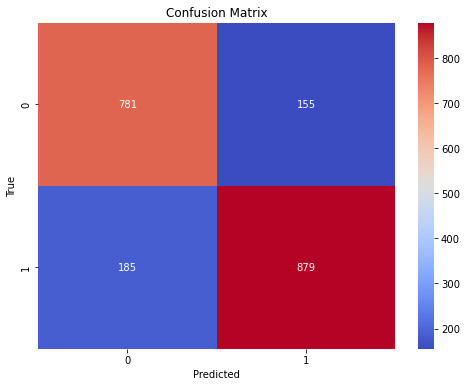

In [41]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [43]:
features = matrix[:500, :-1]
target_1 = matrix[:500, -1]
target=np.reshape(target_1,(500,1))
target.shape
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train,Y_train)
classifier.printTree()

(400, 23)
(400, 1)
(100, 23)
(100, 1)
X_0 <= 0.4178859150044784 ? 0.22350942087834602
 left:X_1 <= 0.9994686802653006 ? 0.032622110477018684
  left:X_20 <= 0.6888509445334311 ? 0.0959906305302316
    left:X_10 <= 0.34776295807169605 ? 0.09972394755003444
        left:X_1 <= 0.9978233166239509 ? 0.08317580340264641
                left:0.0
                right:1.0
        right:X_10 <= 0.5227875738947648 ? 0.48979591836734704
                left:1.0
                right:0.0
    right:X_6 <= 0.7555278867038112 ? 0.1654350690267513
        left:X_1 <= 0.8117503356984317 ? 0.16528925619834722
                left:0.0
                right:1.0
        right:X_21 <= 172.04502433771242 ? 0.2222222222222222
                left:X_5 <= 1.7675755131778028 ? 0.4444444444444444
                                left:1.0
                                right:0.0
                right:0.0
  right:X_17 <= 0.0962836300486673 ? 0.02783332989711962
    left:X_13 <= -8.393903942825645 ? 0.48979591836734

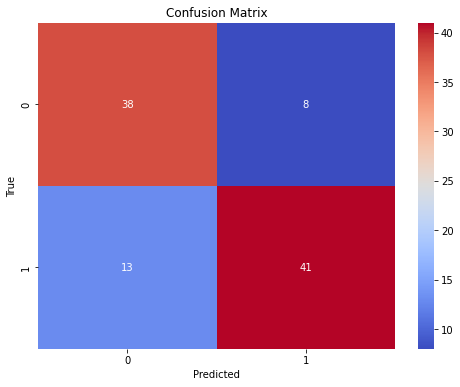

In [45]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [47]:
features = matrix[:1000000, :-1]
target_1 = matrix[:1000000, -1]
target=np.reshape(target_1,(100000,1))
target.shape
X_train, x_test, Y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
print(X_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(y_test.shape)
classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=6)
classifier.fit(X_train,Y_train)
classifier.printTree()
y_pred=classifier.predict(x_test)

(80000, 23)
(80000, 1)
(20000, 23)
(20000, 1)


KeyboardInterrupt: 

In [ ]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()